In [2]:
#Redoing Figure 8 from the RDA paper (showcasing decadal changes in rainfall)

#uses the Pchina_type.nc data set created by RDA_precip_china_type.ipynb
#tests for significance of decadal changes in zonally averaged rainfall.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
from bootstrap import bs, bs_blocks

In [4]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin/"
ff = "Pchina_type.nc"
filename = ferretpath + ff
myf = nc.Dataset(filename, 'r')

In [5]:
P_total =  myf.variables['Pchina_total'][:]
P_band = myf.variables['Pchina_band'][:]
P_local = myf.variables['Pchina_local'][:]

In [27]:
P_total.shape

P_total_5179 = np.mean(P_total[:,:,0:29], axis=2)
P_total_8007 = np.mean(P_total[:,:,29:57], axis=2)
P_total_8093 = np.mean(P_total[:,:,29:43], axis=2)
P_total_9407 = np.mean(P_total[:,:,43:57], axis=2)

P_total_era = [P_total_5179, P_total_8007, P_total_8093, P_total_9407]

P_band_5179 = np.mean(P_band[:,:,0:29], axis=2)
P_band_8007 = np.mean(P_band[:,:,29:57], axis=2)
P_band_8093 = np.mean(P_band[:,:,29:43], axis=2)
P_band_9407 = np.mean(P_band[:,:,43:57], axis=2)

P_band_era = [P_band_5179, P_band_8007, P_band_8093, P_band_9407]

P_local_5179 = np.mean(P_local[:,:,0:29], axis=2)
P_local_8007 = np.mean(P_local[:,:,29:57], axis=2)
P_local_8093 = np.mean(P_local[:,:,29:43], axis=2)
P_local_9407 = np.mean(P_local[:,:,43:57], axis=2)

P_local_era = [P_local_5179, P_local_8007, P_local_8093, P_local_9407]

In [22]:
def smooth(P,dayrange,latrange):
    Psmooth=np.zeros(P.shape)
    
    ll=int((dayrange-1)/2)
    yy=int((latrange-1)/2)
    
    days = P.shape[0]
    lats = P.shape[1]
    
    for d in range(days):
        for j in range(lats):
            
            Psample = P.take(range(d-ll,d+ll+1), mode='wrap', axis=0)
            Ps = Psample[:,max(0,j-yy):min(days,j+yy+1)]
            Psmooth[d,j] = np.mean(np.mean(Ps))
    
    return Psmooth

In [28]:
#smooth out the decadal precipitation means
#but, no latitudinal smoothing since rainfall already effectively smoothed in latitude
daysmth = 15
latsmth = 0

P_total_smth = [ smooth(x,daysmth,latsmth) for x in P_total_era ]
P_band_smth = [ smooth(x,daysmth,latsmth) for x in P_band_era ]
P_local_smth = [ smooth(x,daysmth,latsmth) for x in P_local_era ]

In [25]:
P_total_smth[0]

array([[ 0.88616143,  3.1482148 ,  2.30811016, ...,  0.10006857,
         0.09831012,  0.08960583],
       [ 0.88274412,  3.15319592,  2.31085045, ...,  0.08583542,
         0.084209  ,  0.07739304],
       [ 0.88459144,  3.10720066,  2.27278631, ...,  0.08463029,
         0.08260761,  0.07565719],
       ..., 
       [ 0.96387684,  3.20412062,  2.34427351, ...,  0.0949932 ,
         0.09355803,  0.08505339],
       [ 0.93883661,  3.13562423,  2.29266881, ...,  0.09700965,
         0.09568394,  0.08724337],
       [ 0.91105322,  3.15464623,  2.31316237, ...,  0.0965099 ,
         0.0947539 ,  0.08603204]])

In [29]:
P_local_smth[0]

array([[ 0.76143224,  3.06538706,  2.21011174, ...,  0.10006857,
         0.09831012,  0.08960583],
       [ 0.76343357,  3.07492844,  2.21951426, ...,  0.08583542,
         0.084209  ,  0.07739304],
       [ 0.75996669,  3.02838356,  2.18573183, ...,  0.08463029,
         0.08260761,  0.07565719],
       ..., 
       [ 0.80607992,  3.0977758 ,  2.22129086, ...,  0.0949932 ,
         0.09355803,  0.08505339],
       [ 0.81223037,  3.05043185,  2.19037049, ...,  0.09700965,
         0.09568394,  0.08724337],
       [ 0.78444698,  3.06951869,  2.21098585, ...,  0.0965099 ,
         0.0947539 ,  0.08603204]])

In [30]:
P_band_smth[0]

array([[ 0.12472919,  0.08282775,  0.09799842, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11931055,  0.07826747,  0.09133619, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12462474,  0.0788171 ,  0.08705448, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.15779692,  0.10634482,  0.12298265, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12660624,  0.08519238,  0.10229832, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12660624,  0.08512754,  0.10217652, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
#calculate decadal differences (smoothed and unsmoothed)
#unsmoothed
P_total_diff_8007_5179 = P_total_8007 - P_total_5179
P_band_diff_8007_5179 = P_band_8007 - P_band_5179
P_local_diff_8007_5179 = P_local_8007 - P_local_5179

P_total_diff_9407_8093 = P_total_9407 - P_total_8093
P_band_diff_9407_8093 = P_band_9407 - P_band_8093
P_local_diff_9407_8093 = P_local_9407 - P_local_8093

P_total_diff_8007_5179_smth = P_total_smth[1] - P_total_smth[0]
P_band_diff_8007_5179_smth = P_band_smth[1] - P_band_smth[0]
P_local_diff_8007_5179_smth = P_local_smth[1] - P_local_smth[0]

P_total_diff_9407_8093_smth = P_total_smth[3] - P_total_smth[2]
P_band_diff_9407_8093_smth = P_band_smth[3] - P_band_smth[2]
P_local_diff_9407_8093_smth = P_local_smth[3] - P_local_smth[2]

#stacking to allow for efficient bootstrap testing
P_diff_8007_5179 = [P_total_diff_8007_5179, P_band_diff_8007_5179, P_local_diff_8007_5179, \
                    P_total_diff_8007_5179_smth, P_band_diff_8007_5179_smth, P_local_diff_8007_5179_smth]

P_diff_9407_8093 = [P_total_diff_9407_8093, P_band_diff_9407_8093, P_local_diff_9407_8093, \
                    P_total_diff_9407_8093_smth, P_band_diff_9407_8093_smth, P_local_diff_9407_8093_smth]




<IPython.core.display.Javascript object>


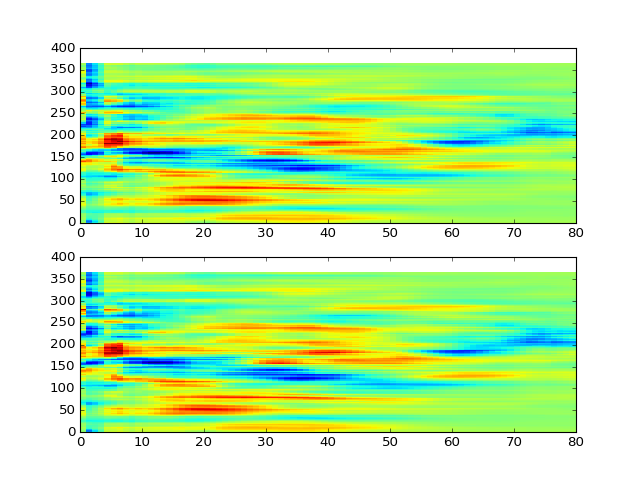

In [42]:
#sanity check that smoothing the data before and after taking the difference leads to the same outcome
plt.subplot(2, 1, 1)
plt.pcolor(smooth(P_diff_8007_5179[0],daysmth,latsmth))

plt.subplot(2, 1, 2)
plt.pcolor(P_diff_8007_5179[3])

In [193]:
qq = np.arange(100)

In [194]:
qq2 = np.reshape(qq,(10,10))

In [197]:
smooth(qq2,9,9)

array([[ 46.44444444,  46.94444444,  47.44444444,  47.94444444,
         48.44444444,  49.44444444,  49.94444444,  50.44444444,
         50.94444444,  51.44444444],
       [ 45.33333333,  45.83333333,  46.33333333,  46.83333333,
         47.33333333,  48.33333333,  48.83333333,  49.33333333,
         49.83333333,  50.33333333],
       [ 44.22222222,  44.72222222,  45.22222222,  45.72222222,
         46.22222222,  47.22222222,  47.72222222,  48.22222222,
         48.72222222,  49.22222222],
       [ 43.11111111,  43.61111111,  44.11111111,  44.61111111,
         45.11111111,  46.11111111,  46.61111111,  47.11111111,
         47.61111111,  48.11111111],
       [ 42.        ,  42.5       ,  43.        ,  43.5       ,
         44.        ,  45.        ,  45.5       ,  46.        ,
         46.5       ,  47.        ],
       [ 52.        ,  52.5       ,  53.        ,  53.5       ,
         54.        ,  55.        ,  55.5       ,  56.        ,
         56.5       ,  57.        ],
       [ 5